Usage example of MediaPipe Face Detection Solution API in Python (see also http://solutions.mediapipe.dev/face_detection).

## mediapipe 설치

In [2]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


## 이미지 업로드

In [3]:
# Upload images that contain face(s) within 2 meters from the camera.
from google.colab import files
uploaded_short_range = files.upload()

# Upload images that contain face(s) within 5 meters from the camera.
from google.colab import files
uploaded_full_range = files.upload()

Saving yes.png to yes.png


Saving yes.png to yes (1).png


## 이미지 사이즈 조절
- 동일한 이미지로 face detection 할 예정.

yes.png


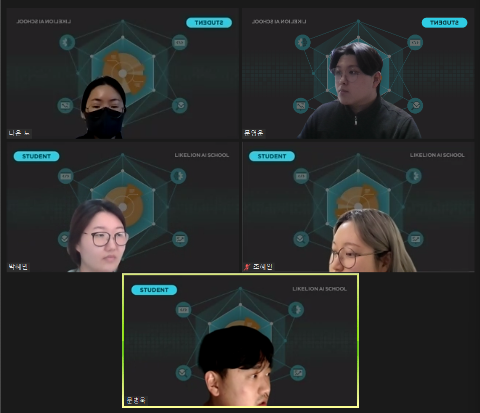

yes.png


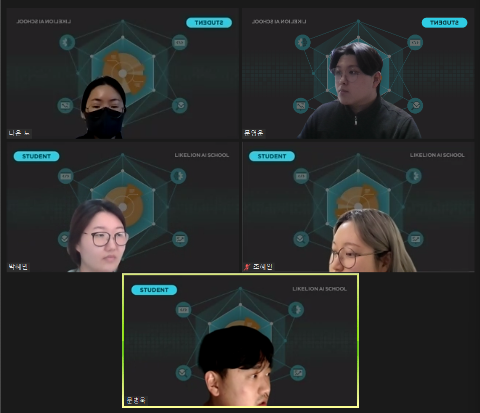

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Preview the images.
short_range_images = {name: cv2.imread(name) for name in uploaded_short_range.keys()}
for name, image in short_range_images.items():
  print(name)   
  resize_and_show(image)

full_range_images = {name: cv2.imread(name) for name in uploaded_full_range.keys()}
for name, image in full_range_images.items():
  print(name)   
  resize_and_show(image)

- 모든 MediaPipe Solutions Python API 예제는 mp.solutions 에 있다.
- MediaPipe Face Mesh 솔루션의 경우 `mp_face_detection = mp.solutions.face_detection` 으로 이 모듈에 액세스할 수 있다.
- 초기화 중에 `min_detection_confidence` 매개변수를 변경할 수 있다. 
> - 매개변수에 대한 자세한 정보를 얻으려면 help(mp_face_detection.FaceDetection)를 실행.

In [5]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

help(mp_face_detection.FaceDetection)

Help on class FaceDetection in module mediapipe.python.solutions.face_detection:

class FaceDetection(mediapipe.python.solution_base.SolutionBase)
 |  FaceDetection(min_detection_confidence=0.5, model_selection=0)
 |  
 |  MediaPipe Face Detection.
 |  
 |  MediaPipe Face Detection processes an RGB image and returns a list of the
 |  detected face location data.
 |  
 |  Please refer to
 |  https://solutions.mediapipe.dev/face_detection#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceDetection
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, min_detection_confidence=0.5, model_selection=0)
 |      Initializes a MediaPipe Face Detection object.
 |      
 |      Args:
 |        min_detection_confidence: Minimum confidence value ([0.0, 1.0]) for face
 |          detection to be considered successful. See details in
 |          https://solutions.mediapipe.dev/face_det

- MediaPipe 의 얼굴 인식은 엄청 빠른 얼굴 인식 솔루션입니다. 
> - 6개의 얼굴 랜드마크(오른쪽 눈, 왼쪽 눈, 코끝, 입 중심, 오른쪽 귀 윗가장자리 위의 점 및 왼쪽 귀 윗가장자리 위의 점)와 다중 얼굴 인식 기능을 지원합니다.
> - 이 모듈은 가볍고 성능이 뛰어난 얼굴 검출기인 BlazeFace 에 기반을 두었습니다.
> - 인식기의 초실시간 기능은 형상 추론(예: 얼굴 그물망)기능 같은 3D 얼굴 키포인트 추출, 얼굴의 특징 또는 표정 판별, 얼굴 부위 분할 같은 작업에 사용할 수 있습니다.
> - GPU 없이 CPU 만으로도 작업이 가능합니다. 
- model_selection (모델 선택)
> - 모델 인덱스는 0 또는 1
> - 0 을 사용하면 카메라 2m 이내의 부분적 모델 촬영에 적합하고,
> - 1은 5m 이내에서 전신 모델을 촬영하는 데 적합합니다.
> - 지정하지 않을 경우의 기본값은 0 입니다.
- min_detection_confidence (최소 감지 신뢰값)
> - 검출에 성공한 것으로 간주할 얼굴의 검출 모델의 신뢰값은 ([0.0, 1.0]) 입니다.
> - 기본값은 0.5 입니다. 

In [6]:
# Prepare DrawingSpec for drawing the face landmarks later.
# 점으로 6개의 얼굴 랜드마크 표시
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face detections of yes.png:


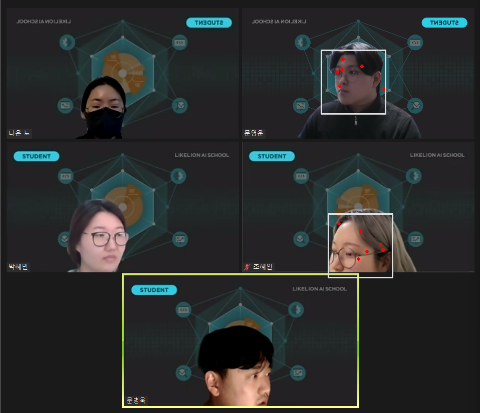

In [11]:
# Run MediaPipe Face Detection with short range model.
# min_detection_confidence(최소 감지 신뢰값): 기본값(0.5) => 0.2 => 0.8 => 1.2 로 조정.
with mp_face_detection.FaceDetection(
    min_detection_confidence=1.2, model_selection=0) as face_detection:
  for name, image in short_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

Face detections of yes.png:


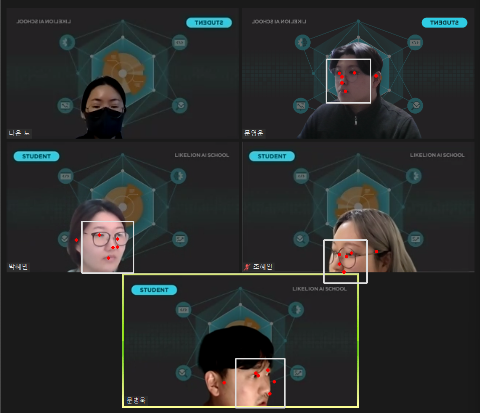

In [13]:
# Run MediaPipe Face Detection with full range model.
# min_detection_confidence(최소 감지 신뢰값): 기본값(0.5) => 0.2 => 0.8 => 1.2로 조정.
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.8, model_selection=1) as face_detection:
  for name, image in full_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

## test 결과
- 마스크 쓴 사람의 경우 랜드마크를 감지하기 어렵기 때문에 얼굴을 잡기 힘들다는 것을 확인.
- model_selection (모델 선택)에 따라서 